# How are in-demand skills trending for Data Analysts?

### Methodology

- Aggregate skill counts monthly
- Re-aggregate based on percentage of total jobs
- Plot the monthly skill demand

In [1]:
#importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)

### Filtering our dataframe only for Data Analysts Jobs in India!!

In [29]:
df_DA_india = df[(df['job_title'] == 'Data Analyst') & (df['job_location'] == 'India')].copy()

df_DA_india['job_posted_month'] = df_DA_india['job_posted_date'].dt.month

df_DA_explode = df_DA_india.explode('job_skills').copy()

### Pivoting our dataframe

In [30]:
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month', columns='job_skills',  aggfunc='size', fill_value=0)
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()

df_DA_pivot = df_DA_pivot.sort_values(by='Total', axis=1, ascending=False)
df_DA_pivot.drop('Total', inplace=True)

In [31]:
df_DA_pivot

job_skills,sql,python,excel,tableau,power bi,sas,r,aws,azure,flow,...,splunk,elasticsearch,powershell,react.js,redis,selenium,slack,confluence,solidity,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,17,13,11,11,7,4,3,3,2,2,...,0,0,0,0,0,1,0,0,0,0
2,28,13,16,11,8,6,10,2,2,1,...,0,0,0,0,0,0,0,0,0,0
3,15,7,9,9,4,6,3,1,1,4,...,0,0,0,0,0,0,0,0,0,0
4,14,11,8,6,6,6,5,0,3,3,...,0,1,0,1,1,0,0,0,0,0
5,26,14,20,16,9,6,7,3,6,2,...,0,0,0,0,0,0,0,0,0,0
6,23,20,18,18,12,12,8,4,5,5,...,0,0,0,0,0,0,0,0,0,0
7,32,20,20,20,14,14,9,2,4,5,...,0,0,0,0,0,0,0,0,0,0
8,34,21,19,19,22,8,7,7,3,3,...,0,0,0,0,0,0,0,0,0,0
9,30,20,19,17,14,4,5,4,1,2,...,0,0,0,0,0,0,0,1,0,0


In [32]:
df_total = df_DA_india.groupby('job_posted_month').size()

In [33]:
df_total

job_posted_month
1     40
2     39
3     25
4     23
5     37
6     45
7     56
8     54
9     52
10    30
11    70
12    60
dtype: int64

In [34]:
df_total = df_DA_india.groupby('job_posted_month').size()
df_DA_percent = df_DA_pivot.div(df_total/100, axis=0)

df_DA_percent

job_skills,sql,python,excel,tableau,power bi,sas,r,aws,azure,flow,...,splunk,elasticsearch,powershell,react.js,redis,selenium,slack,confluence,solidity,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
1,42.500000,32.500000,27.500000,27.500000,17.500000,10.000000,7.500000,7.500000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.5,0.000000,0.000000,0.000000,0.000000
2,71.794872,33.333333,41.025641,28.205128,20.512821,15.384615,25.641026,5.128205,5.128205,2.564103,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,60.000000,28.000000,36.000000,36.000000,16.000000,24.000000,12.000000,4.000000,4.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
4,60.869565,47.826087,34.782609,26.086957,26.086957,26.086957,21.739130,0.000000,13.043478,13.043478,...,0.000000,4.347826,0.000000,4.347826,4.347826,0.0,0.000000,0.000000,0.000000,0.000000
5,70.270270,37.837838,54.054054,43.243243,24.324324,16.216216,18.918919,8.108108,16.216216,5.405405,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
6,51.111111,44.444444,40.000000,40.000000,26.666667,26.666667,17.777778,8.888889,11.111111,11.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
7,57.142857,35.714286,35.714286,35.714286,25.000000,25.000000,16.071429,3.571429,7.142857,8.928571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
8,62.962963,38.888889,35.185185,35.185185,40.740741,14.814815,12.962963,12.962963,5.555556,5.555556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
9,57.692308,38.461538,36.538462,32.692308,26.923077,7.692308,9.615385,7.692308,1.923077,3.846154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.923077,0.000000,0.000000


In [35]:
# Assuming df_DA_percent at this point has 'job_posted_month' as its index
# (as it does after cell 41)

# Step 1: Convert the index (month numbers) into a column
# Since the index is already named 'job_posted_month', reset_index() will
# move it to a column with that same name.
df_DA_percent = df_DA_percent.reset_index()

# Step 2: Convert month numbers to abbreviated names
# Ensure the 'job_posted_month' column is treated as integers for conversion
df_DA_percent['job_posted_month'] = df_DA_percent['job_posted_month'].apply(
    lambda x: pd.to_datetime(f'2023-{int(x)}-01').strftime('%b')
)

# Step 3: Set the cleaned month names as the new index
df_DA_percent = df_DA_percent.set_index('job_posted_month')

# Optional Step 4: Sort the months properly
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_DA_percent = df_DA_percent.loc[month_order]

df_DA_percent

job_skills,sql,python,excel,tableau,power bi,sas,r,aws,azure,flow,...,splunk,elasticsearch,powershell,react.js,redis,selenium,slack,confluence,solidity,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,42.500000,32.500000,27.500000,27.500000,17.500000,10.000000,7.500000,7.500000,5.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.5,0.000000,0.000000,0.000000,0.000000
Feb,71.794872,33.333333,41.025641,28.205128,20.512821,15.384615,25.641026,5.128205,5.128205,2.564103,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Mar,60.000000,28.000000,36.000000,36.000000,16.000000,24.000000,12.000000,4.000000,4.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Apr,60.869565,47.826087,34.782609,26.086957,26.086957,26.086957,21.739130,0.000000,13.043478,13.043478,...,0.000000,4.347826,0.000000,4.347826,4.347826,0.0,0.000000,0.000000,0.000000,0.000000
May,70.270270,37.837838,54.054054,43.243243,24.324324,16.216216,18.918919,8.108108,16.216216,5.405405,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Jun,51.111111,44.444444,40.000000,40.000000,26.666667,26.666667,17.777778,8.888889,11.111111,11.111111,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Jul,57.142857,35.714286,35.714286,35.714286,25.000000,25.000000,16.071429,3.571429,7.142857,8.928571,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Aug,62.962963,38.888889,35.185185,35.185185,40.740741,14.814815,12.962963,12.962963,5.555556,5.555556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Sep,57.692308,38.461538,36.538462,32.692308,26.923077,7.692308,9.615385,7.692308,1.923077,3.846154,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.923077,0.000000,0.000000


In [36]:
top_skills

Index(['sql', 'python', 'excel', 'tableau', 'power bi'], dtype='object', name='job_skills')

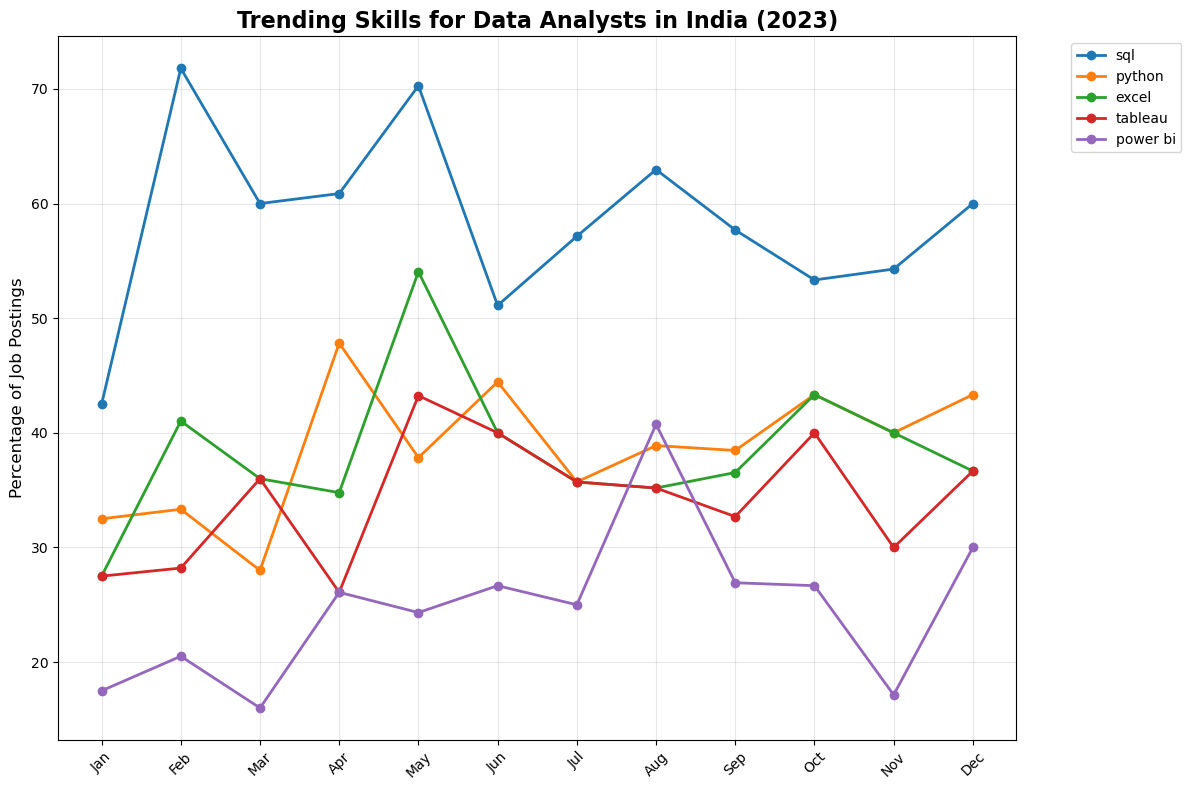

In [37]:
# Visualization of top skills trends

# Select top 8 most in-demand skills for cleaner visualization
top_skills = df_DA_percent.mean().sort_values(ascending=False).head(5).index

# Create the plot
plt.figure(figsize=(12, 8))

# Plot trends for top skills
for skill in top_skills:
    plt.plot(df_DA_percent.index, df_DA_percent[skill], marker='o', linewidth=2, label=skill)

plt.title('Trending Skills for Data Analysts in India (2023)', fontsize=16, fontweight='bold')
plt.xlabel('')
plt.ylabel('Percentage of Job Postings', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
